<font size="6"><center><b>TECNOLÓGICO DE MONTERREY</b></center></font>

<br>

<font size="5"><center><b>Sistemas neuronales</b></center></font>

<font size="5"><center><b>(Deep Learning)</b></center></font>

<br>

<font size="5"><center><em> Profr. Dr. Leonardo Chang</em></center></font>

<br>

<font size="5"><center><b>Homework 01. Logistic Regression with a Neural Network mindset</b></center></font>

<br>

<font size="4"><center><em>Authors:</em></center></font>

<br>


<font size="5"><center><em> Jesús Leopoldo Llano García (A01748867)</em></center></font>

<font size="5"><center><em> Ariel Arturo Gamboa Vázquez  (A01749802)</em></center></font>

<br>

<font size="4"><center> November 11, 2019</center></font>

# Logistic Regression with a Neural Network mindset

Welcome! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [16]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [66]:
train_set_y.shape

(1, 209)

In [65]:
MBi_Test_y.shape

(1, 10000)

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [1], it's a 'cat' picture.
(209, 64, 64, 3)


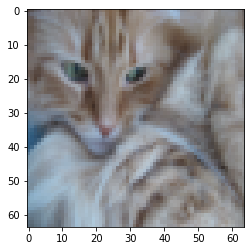

In [17]:
# Example of a picture
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")


print(train_set_x_orig.shape)


Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find and print the values for:
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

In [18]:
### START CODE HERE ###
print(f'm_train {len(train_set_x_orig)}')
print(f'm_test {len(test_set_x_orig)}')
print(f'heig = {train_set_x_orig[1].shape[1]} == weight = {train_set_x_orig[1].shape[0]}')


### END CODE HERE ###

m_train 209
m_test 50
heig = 64 == weight = 64


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [19]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [20]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [21]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [22]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [23]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [24]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

In [25]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X)+b)             # compute activation
    cost = -1/m *(np.dot(np.log(A),Y.T) + np.dot(np.log(1-A),(1-Y).T))     # compute cost
                        
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1/m * np.dot(X, (A-Y).T)
    db = np.mean(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [26]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"].T))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601 2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [27]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation 
        ### START CODE HERE ### 
        results = propagate(w,b,X,Y)
        grads = results[0]
        cost = results[1]
        ### END CODE HERE ###
        
        # update rule for w and b
        ### START CODE HERE ###
        dw = grads['dw']
        db = grads['db']
        w = w - dw * learning_rate
        b = b - db * learning_rate
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [28]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"].T))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"].T))
print ("db = " + str(grads["db"]))

w = [[0.19033591 0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042 1.41625495]]
db = 0.21919450454067657


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591]
 [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>

</table>

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [73]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### 
    
    A= sigmoid(np.dot(w.T,X)+b)
    #print(A[0])
    
    ### END CODE HERE ###
    
    # Convert probabilities to actual predictions
    ### START CODE HERE ### 
    for i,pred in enumerate(A[0]):
        print(i,pred)
        if pred > 0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    ### END CODE HERE ###
    
    
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [74]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

0 0.5224197562625682
1 0.5096067700926029
2 0.34597965087838745
predictions = [[1. 1. 0.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [31]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w,b,X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters['w']
    b = parameters['b']
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [32]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
0 0.9436698830369612
1 0.8609531091147995
2 0.8889671462821572
3 0.9363064057793109
4 0.7407540258589634
5 0.5284961891400342
6 0.030946772186584013
7 0.8570768062014934
8 0.884579253245499
9 0.6727969649266264
10 0.2660108482423609
11 0.48237940376786537
12 0.7474115721769924
13 0.785757292

In [70]:
print(train_set_x.shape, train_set_y.shape, test_set_x.shape, test_set_y.shape)

(12288, 209) (1, 209) (12288, 50) (1, 50)


**Expected Output**: 

<table style="width:40%"> 
    <tr>
        <td> 
            **Cost after iteration 0 **  
        </td> 
        <td> 
            0.693147 
        </td>
    </tr>
    <tr>
        <td> <center> ... </center> </td> 
        <td> <center>... </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td> **Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 




**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. 

y = 0, you predicted that it is a cat picture


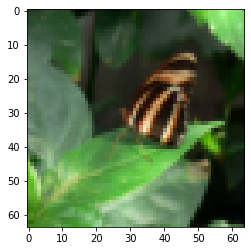

In [34]:
# Example of a picture that was wrongly classified.
num_px=64
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
#print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[d["Y_prediction_test"][0,index]].decode("utf-8") +  "\" picture.")
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a " + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8")+ ' picture')

Let's also plot the cost function and the gradients.

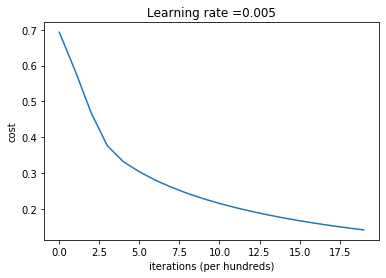

In [35]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [36]:
from mlxtend.data import loadlocal_mnist

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

# 7 - Test with your own data ##

Choose a dataset (or a subset) related with your thesis project and test the previously implemented classifier. Note that this is a two-class problem, so if your dataset have three or more classes, select two.

Please report and discuss:
- Description of the used dataset, e.g., number of training and testing samples, kind of data, problem, etc.
- Train and test accuracy.
- Play with the learning rate and the number of iterations.
- Try different initialization methods and compare the results.
- Test other preprocessings (center the data, or divide each row by its standard deviation)

In [67]:
Mnist_Train_X, Mnist_Train_y = loadlocal_mnist(
        images_path='datasets/train-images-idx3-ubyte', 
        labels_path='datasets/train-labels-idx1-ubyte',
        )

Mnist_Test_X, Mnist_Test_y = loadlocal_mnist(
        images_path='datasets/t10k-images-idx3-ubyte', 
        labels_path='datasets/t10k-labels-idx1-ubyte',
        )

#print(Mnist_Train_X[1], Mnist_Train_y[1])

MBi_Train_y = []# MNist_Binary Training tags

for element in Mnist_Train_y:
    if element == 0:
        MBi_Train_y.append(1)
    else:
        MBi_Train_y.append(0)
        
MBi_Test_y = []

for element in Mnist_Test_y:
    if element == 0:
        MBi_Test_y.append(1)
    else:
        MBi_Test_y.append(0)
MBi_Test_y = [MBi_Test_y]
MBi_Test_y = np.asarray(MBi_Test_y)
MBi_Train_y= [MBi_Train_y]
MBi_Train_y = np.asarray(MBi_Train_y)
Mnist_Test_X = np.asarray(Mnist_Test_X)
Mnist_Train_X = np.asarray(Mnist_Train_X)

#print(MBi_Train_y[0:50])
#print(Mnist_Train_y[0:50])
#print(MBi_Test_y[0:50])
#print(Mnist_Test_y[0:50])

Mnist_Train_X_flatten = Mnist_Train_X.reshape(Mnist_Train_X.shape[0], -1).T 
MBI_Test_X_flatten = Mnist_Test_X.reshape(Mnist_Test_X.shape[0], -1).T

Mnist_Train_X = Mnist_Train_X_flatten/255.
MBI_Test_X = MBI_Test_X_flatten/255.

In [75]:
d = model(Mnist_Train_X, MBi_Train_y, Mnist_Test_X.T, MBi_Test_y, num_iterations = 200, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.281626


/home/guby/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


0 6.326155010938041e-176
1 1.4127350488991844e-174
2 3.182231067387108e-162
3 7.097373138326535e-136
4 3.3036059367850744e-149
5 1.5851539918132564e-232
6 3.0428093961588655e-236
7 5.3678754943463455e-253
8 8.716768524424015e-210
9 1.2369413349514034e-306
10 1.0
11 2.0410125541779366e-146
12 2.583655191233958e-270
13 7.707533908618175e-35
14 1.338394089742393e-256
15 5.311557838078558e-99
16 4.0902820001650386e-217
17 3.4689616035020336e-167
18 2.256053231799064e-262
19 1.829796688219208e-203
20 0.0
21 4.960184045346003e-218
22 1.2682826949711739e-202
23 6.361463072892449e-175
24 2.1863300280961312e-151
25 7.247515594497842e-99
26 9.236186544391864e-127
27 2.135391114699483e-212
28 6.233790259122085e-119
29 1.3189056090758804e-193
30 1.1907566597348526e-271
31 3.023193499757199e-170
32 2.1247229617545025e-255
33 1.2381609257555337e-25
34 4.1016835114816353e-283
35 4.7985413983155806e-150
36 1.3446404937012954e-209
37 4.0043334906385225e-226
38 5.287558766999192e-132
39 4.82092239920702

1638 2.965133330188344e-232
1639 7.815743852193759e-165
1640 3.1118181799184206e-145
1641 9.012805930848942e-155
1642 9.901307151751811e-221
1643 3.707185937791882e-250
1644 5.733929818454925e-166
1645 3.417448665192736e-270
1646 2.1219287832923466e-252
1647 4.921603817987724e-251
1648 4.508870991594203e-201
1649 1.7461856320999226e-255
1650 0.999999999944065
1651 2.484247796415234e-276
1652 9.602831287912542e-155
1653 2.3469105141556563e-196
1654 0.0
1655 3.7772121788881994e-110
1656 3.6600649627441534e-191
1657 6.197814572281178e-166
1658 7.1190586076542945e-183
1659 5.3096933477776336e-201
1660 2.8261317406199433e-189
1661 0.0
1662 4.3025661084054866e-217
1663 1.4492650239596646e-301
1664 7.527453056590369e-259
1665 4.7386232984941875e-230
1666 4.205922216355688e-238
1667 1.9052923569981843e-280
1668 2.616588661942746e-283
1669 3.686140256246583e-227
1670 3.550636993861553e-149
1671 2.454809139775892e-253
1672 1.2864854155300772e-254
1673 1.258937146010415e-236
1674 1.94072989518964

3130 3.6062073325981204e-75
3131 4.259334953225744e-160
3132 5.122902624315039e-271
3133 0.0
3134 1.1301229892862261e-251
3135 2.1126523875734773e-207
3136 1.2476060093209796e-259
3137 3.440056250826605e-285
3138 6.96970521413558e-61
3139 3.1208715068370895e-298
3140 1.9862966537132536e-118
3141 1.0006493592939641e-223
3142 1.0669460715355103e-305
3143 8.230162431176384e-196
3144 4.793682578229006e-154
3145 1.355177964321425e-172
3146 4.24331504430202e-174
3147 2.3319145839732158e-247
3148 2.5370494715580506e-174
3149 2.278899000042203e-288
3150 4.188277363152901e-271
3151 2.527027180130893e-149
3152 2.778628104429634e-174
3153 1.7511444301162602e-248
3154 9.711849288524047e-284
3155 1.4572451090729992e-247
3156 3.7931271059239655e-201
3157 1.8038887071129898e-105
3158 0.0
3159 2.3473129633859608e-288
3160 1.3766520159733729e-216
3161 5.767662950286458e-252
3162 4.485722719511841e-251
3163 0.0
3164 2.475698017267261e-142
3165 1.4497671822935003e-292
3166 7.441294977213499e-293
3167 8.3

5250 3.6482349159147787e-202
5251 2.473093699447014e-05
5252 1.309572088599986e-199
5253 2.863549268116932e-52
5254 4.2187970990165973e-203
5255 1.648905679962758e-31
5256 3.253384093995711e-166
5257 3.538909020924976e-41
5258 3.436145264711822e-250
5259 0.9999999999998086
5260 1.8220012104341104e-210
5261 2.403225768410125e-192
5262 1.818851091753803e-229
5263 1.6091965212729498e-110
5264 6.276654917950097e-260
5265 2.485241452111386e-118
5266 2.1219240108808252e-224
5267 5.0154632336504594e-191
5268 1.7616670493137191e-262
5269 2.280235028321903e-262
5270 1.7156995624515268e-149
5271 5.072790670919926e-283
5272 0.0
5273 9.150541239625324e-266
5274 0.0
5275 5.299594085002912e-246
5276 0.0
5277 0.0
5278 8.207558966792006e-306
5279 0.0
5280 7.100411394427183e-102
5281 1.101801008883386e-276
5282 6.359407448820407e-270
5283 3.282158699465644e-302
5284 7.866255088925096e-298
5285 3.4996409537443746e-248
5286 0.0
5287 4.059697718730121e-167
5288 4.011591623564294e-199
5289 9.61564274345646

7141 0.0
7142 3.8628650816933835e-222
7143 0.0
7144 5.461957453351793e-214
7145 1.5355825130636738e-188
7146 0.0
7147 0.0
7148 5.595087155719754e-306
7149 6.668309961735678e-270
7150 3.0435556635731253e-283
7151 0.0
7152 3.9412045412746885e-207
7153 0.0
7154 9.64704767767435e-289
7155 3.2205730727443826e-148
7156 4.824043587836663e-275
7157 1.265137940438512e-233
7158 3.792792521463784e-225
7159 1.1910511149756933e-274
7160 1.0861439647655764e-165
7161 1.891666213184334e-182
7162 1.350412594245359e-255
7163 0.0
7164 0.0
7165 2.26987010438699e-247
7166 1.4147184420794331e-276
7167 6.571587882869675e-194
7168 2.467242963314835e-144
7169 0.0
7170 2.2304117480139993e-281
7171 1.387388616157521e-278
7172 1.1115862139340645e-237
7173 2.10714359304278e-267
7174 1.2463871017935819e-294
7175 0.9999794661190042
7176 1.3128980824564107e-174
7177 1.5243882315580203e-239
7178 1.7444674548401955e-127
7179 3.3729134385611654e-169
7180 3.4228622729321464e-204
7181 5.213298053403553e-210
7182 9.3059496

9089 0.0
9090 1.0796146601770374e-300
9091 0.0
9092 0.0
9093 0.0
9094 0.0
9095 1.592225404877127e-08
9096 8.371862689016965e-293
9097 0.0
9098 0.0
9099 0.0
9100 0.0
9101 1.8320694778956761e-255
9102 0.0
9103 0.0
9104 9.470175548392774e-303
9105 2.850737024532858e-41
9106 2.2041231434104512e-277
9107 0.0
9108 1.0098161765972165e-147
9109 8.219356102706649e-233
9110 0.0
9111 0.0
9112 0.0
9113 1.3116740125644326e-256
9114 2.1000081466975617e-261
9115 0.0
9116 0.0
9117 1.1254299152760171e-192
9118 1.1808740443264706e-298
9119 1.9548875846474874e-207
9120 6.325668411345715e-230
9121 5.944091409034451e-235
9122 6.7331756769959145e-261
9123 2.4525038297322757e-287
9124 6.852721701331746e-252
9125 4.020686186958691e-294
9126 0.0
9127 0.0
9128 0.0
9129 0.0
9130 1.6742827151638302e-230
9131 0.0
9132 2.431690513557673e-258
9133 1.3154701305227967e-251
9134 8.357857875285845e-56
9135 0.0
9136 0.0
9137 3.4756130792614144e-69
9138 0.0
9139 0.0
9140 8.214489774487465e-292
9141 8.693916523125509e-178


636 0.15501807576045773
637 0.17080800166950189
638 0.13084014464472052
639 0.3948285986369015
640 0.261089821723897
641 0.04552287690017299
642 0.06862009732805964
643 0.06510306349386315
644 0.11280969760371704
645 0.04546832090669517
646 0.11738239409298128
647 0.2193454795208462
648 0.14244050540576683
649 0.069212491429535
650 0.08110355614946321
651 0.1285357194455143
652 0.10080634302114301
653 0.13744137070306336
654 0.07328007866668645
655 0.11310445252040124
656 0.15701760274451515
657 0.09996507461964065
658 0.12508513472469915
659 0.06637313587445118
660 0.14009543417613465
661 0.08959267651866383
662 0.33765239186034074
663 0.1506061130939205
664 0.060179320412914024
665 0.051996773085661606
666 0.2140995951597612
667 0.2088204236819204
668 0.26088415402066634
669 0.42147490592548537
670 0.2247995970012448
671 0.0531158385208921
672 0.04469684891444213
673 0.08058174294642938
674 0.16968006681308292
675 0.08327224870473741
676 0.13246295290000076
677 0.0957334502435276
678

2458 0.1001921804012528
2459 0.06509606855649683
2460 0.08991430638964923
2461 0.22882522177132655
2462 0.16324311898370433
2463 0.08996648195613094
2464 0.12236194582675922
2465 0.05909412342626274
2466 0.049519173853410245
2467 0.04642552155694564
2468 0.14657587320656906
2469 0.051750510420429816
2470 0.07642979021100671
2471 0.04537952468618086
2472 0.04294753755969928
2473 0.5007901375103647
2474 0.06718512907769211
2475 0.06390585812202419
2476 0.05159334795401384
2477 0.10711215373732764
2478 0.16993213059306714
2479 0.0775692163659787
2480 0.10133394156806218
2481 0.053803098083708284
2482 0.024633799196662656
2483 0.46912110978689414
2484 0.05045609116795429
2485 0.07015660395230391
2486 0.10975752283833468
2487 0.12178672320080605
2488 0.09877717303852473
2489 0.04355532705172642
2490 0.07239905872609978
2491 0.1276470232648925
2492 0.18653411477498072
2493 0.3624757584369403
2494 0.21764177273067517
2495 0.1017368338351078
2496 0.0933319348463136
2497 0.11961470148453733
249

4107 0.18648232052253239
4108 0.4486599891110031
4109 0.08981779130109925
4110 0.06963556202190738
4111 0.14071626386741423
4112 0.07003457081062942
4113 0.1750559610428783
4114 0.20556758593741517
4115 0.2864387205885303
4116 0.061833002921392814
4117 0.04506949720778105
4118 0.08389810638670295
4119 0.10834724465210896
4120 0.14654103631681226
4121 0.05801968223165883
4122 0.05041140479535364
4123 0.21192146285023608
4124 0.12647214690778244
4125 0.1740924143775203
4126 0.151379289511347
4127 0.05801829649527335
4128 0.06386450616833013
4129 0.05797067477038436
4130 0.1819572094605666
4131 0.06273320156176979
4132 0.16622297548329257
4133 0.18260569095508347
4134 0.2974367696456626
4135 0.08151422057045367
4136 0.1039479023850458
4137 0.08477501413614381
4138 0.07673197039609028
4139 0.07695912901346737
4140 0.06898795649000371
4141 0.12384459557682465
4142 0.0478947890167964
4143 0.0517789011615956
4144 0.15582038011957858
4145 0.10859273663318907
4146 0.1480025559956516
4147 0.0410

6064 0.1200901985525299
6065 0.4118989376721721
6066 0.058274026281282046
6067 0.036382564549596395
6068 0.1225363419537306
6069 0.06271146847842189
6070 0.08653033815135841
6071 0.06713114147251936
6072 0.04270590963273665
6073 0.042596971662913964
6074 0.08651751368144331
6075 0.03195431995901647
6076 0.46928306001128123
6077 0.11282817766232332
6078 0.052373403014800854
6079 0.06592624867837023
6080 0.23769280580336494
6081 0.05855694897139322
6082 0.22589112401904224
6083 0.034669430901411856
6084 0.17740741037695387
6085 0.10139405787598738
6086 0.12470254144650676
6087 0.06357043866274972
6088 0.2362134438163012
6089 0.13955363300727328
6090 0.1572787060114007
6091 0.06740310622520504
6092 0.11695057624840356
6093 0.01698771478740578
6094 0.09476354554894258
6095 0.10542814409333305
6096 0.14268804590024003
6097 0.21120186984781605
6098 0.08148606026457192
6099 0.025214065864922492
6100 0.03435333922185655
6101 0.05532081419747774
6102 0.06492795518471128
6103 0.25030898064243956

8101 0.05145810338872754
8102 0.04251824184684622
8103 0.12390533485878283
8104 0.06848347221750625
8105 0.09698849392632447
8106 0.14897056603101594
8107 0.09413994064955877
8108 0.3191063317977324
8109 0.08811417523109685
8110 0.04333592646706393
8111 0.07259247355737544
8112 0.03438252712804298
8113 0.34205367598556763
8114 0.051728403866780716
8115 0.13629612829813295
8116 0.11546856361400377
8117 0.16781417197222376
8118 0.08001720267838172
8119 0.22747355959546584
8120 0.09805220177982737
8121 0.13242712935446926
8122 0.041094696826175524
8123 0.12068188635636476
8124 0.10361538288533485
8125 0.09982547827127874
8126 0.2343179183819378
8127 0.0843070867673226
8128 0.17465710509920002
8129 0.5280557416801511
8130 0.04274269182546296
8131 0.17295944150765327
8132 0.06251311157569464
8133 0.15848023171448497
8134 0.26936026026634624
8135 0.10005058991552226
8136 0.08964207444784916
8137 0.08638768376970807
8138 0.16022513677478975
8139 0.09258170505850177
8140 0.14221141908160145
81

9926 0.10822299885315001
9927 0.09375736274202923
9928 0.11463032636775684
9929 0.11561692882341038
9930 0.09656048609601366
9931 0.10150857318012001
9932 0.22840242179999162
9933 0.058130788895983714
9934 0.5084895870922228
9935 0.06586910803138069
9936 0.03524722732840483
9937 0.06900774190555765
9938 0.16683639704211387
9939 0.09130143095224844
9940 0.10221160785263989
9941 0.047434053620930866
9942 0.1077502636076672
9943 0.12753586483341964
9944 0.09396916093513086
9945 0.14930789099291666
9946 0.0655131781224001
9947 0.1867029741122561
9948 0.1095204442909086
9949 0.055206782538842765
9950 0.12570414574236433
9951 0.1389295544728925
9952 0.03221544961301016
9953 0.07884504039179778
9954 0.12279465000165221
9955 0.14280878509689118
9956 0.11962094176303116
9957 0.11631783892498677
9958 0.18811950114940493
9959 0.15870585831983466
9960 0.18088845889090582
9961 0.09498290647253399
9962 0.14452945195916392
9963 0.31633376569446064
9964 0.1006802469031023
9965 0.4053059193443578
9966 

11921 0.024394192616014432
11922 0.0805804779850522
11923 0.049359737152419585
11924 0.09745657441767784
11925 0.039696774737310876
11926 0.13289088814742414
11927 0.052194577485820626
11928 0.09053436365658989
11929 0.06814908483536032
11930 0.13603203320041407
11931 0.07128904886177569
11932 0.20294372154785328
11933 0.14515727271871645
11934 0.02989379288272908
11935 0.14711778911805562
11936 0.11793628601194102
11937 0.06820447256521447
11938 0.1170960274205976
11939 0.1395228114315104
11940 0.19461584187545503
11941 0.04117427564000345
11942 0.09036600835393813
11943 0.10517278332149017
11944 0.08345273275214336
11945 0.30990337505667404
11946 0.23988370680676685
11947 0.01702831106142754
11948 0.40746258300754407
11949 0.023985417156375716
11950 0.0680308137106289
11951 0.0241055983464504
11952 0.14986796402317457
11953 0.07480638003458877
11954 0.1230186732554416
11955 0.06395257055508935
11956 0.15895215874428797
11957 0.126201324045056
11958 0.12474495331617237
11959 0.0530888

14139 0.06482869738853943
14140 0.16321007934920623
14141 0.08045688798618957
14142 0.17771782736064476
14143 0.04524242806775562
14144 0.316301409594691
14145 0.17746075534165823
14146 0.20415002514881275
14147 0.1602062321016153
14148 0.5016118935616877
14149 0.12345877120947008
14150 0.20252858553657196
14151 0.03613854422382663
14152 0.13779064892526866
14153 0.10666589253510485
14154 0.08982112391075352
14155 0.055662778754754255
14156 0.0715227937047392
14157 0.34797161441314056
14158 0.49470413320117856
14159 0.062131374545106484
14160 0.3452950917372602
14161 0.1886280166457661
14162 0.1326950835337686
14163 0.03508188546091383
14164 0.1481410384324392
14165 0.31887317069148824
14166 0.06245031579176557
14167 0.09621417012791371
14168 0.19297605772975915
14169 0.07462255246950159
14170 0.035849929795799644
14171 0.052452853562764155
14172 0.08641180349600025
14173 0.019770375856275387
14174 0.3044752204243925
14175 0.06464381156184108
14176 0.1725580317476014
14177 0.0428111664

15994 0.08150259253685449
15995 0.04095257305514738
15996 0.1593212573460287
15997 0.06312378207522001
15998 0.0752481778074652
15999 0.07517507835685723
16000 0.024810656527347992
16001 0.0509990445199469
16002 0.12445283003817491
16003 0.04708034322672011
16004 0.07853373728165916
16005 0.03911666616467191
16006 0.1146558552378433
16007 0.09557504237894955
16008 0.041384576081998595
16009 0.03839947857290743
16010 0.18662505561591308
16011 0.08787527781944184
16012 0.20294497917616386
16013 0.0807297904111623
16014 0.07927454282657692
16015 0.08807436905091821
16016 0.09757190457392154
16017 0.0912737637823848
16018 0.05352276294448834
16019 0.09015539182515218
16020 0.0677261369741824
16021 0.09241239319625871
16022 0.19097343332202682
16023 0.06787860955742527
16024 0.08257595887152089
16025 0.033409017999983935
16026 0.043141578775175535
16027 0.1278856224514588
16028 0.20026562179478252
16029 0.078176970676072
16030 0.049428654102228596
16031 0.18887219647614237
16032 0.087076265

18104 0.099817473745485
18105 0.087561995702572
18106 0.10944653036638488
18107 0.0796227747732171
18108 0.05634162055562537
18109 0.06763564568751695
18110 0.0898669458853739
18111 0.05946483578879632
18112 0.3422728002770037
18113 0.4532790693585232
18114 0.0625118909403135
18115 0.08529335105552578
18116 0.13762290432613108
18117 0.07861676587385898
18118 0.08393735289795856
18119 0.08058796681959622
18120 0.2349483981039649
18121 0.0690622304376749
18122 0.11007854888634033
18123 0.07910173703412055
18124 0.3488867772355065
18125 0.07067440160288083
18126 0.0826252545376629
18127 0.19871301054805532
18128 0.05716609783826434
18129 0.036232959063368826
18130 0.11526960663381491
18131 0.0615542259140188
18132 0.27776354524519037
18133 0.06723252450829728
18134 0.08897980666081416
18135 0.12624936929608171
18136 0.12982846894422637
18137 0.16862826397060274
18138 0.030277304579028864
18139 0.05782382005320694
18140 0.0883742895628159
18141 0.14286731160091587
18142 0.05378865925408009

20062 0.12646206048295247
20063 0.04793303564152247
20064 0.11518030819720054
20065 0.07576863629737099
20066 0.19804356562648986
20067 0.10461546646176043
20068 0.07017997457475197
20069 0.07501475933399039
20070 0.0638397771076208
20071 0.062399301270450715
20072 0.04311174867811554
20073 0.04398014823655188
20074 0.0739331125250796
20075 0.04073033326667273
20076 0.05354542884959926
20077 0.1144738698324936
20078 0.07628960766004153
20079 0.044854075785833135
20080 0.11249592996964866
20081 0.059732864155437854
20082 0.06058228710242093
20083 0.09958066072633559
20084 0.061104561606793444
20085 0.36752565264880466
20086 0.09549910710247664
20087 0.11318655756834099
20088 0.07918295651519744
20089 0.08154160720968201
20090 0.2083570891617375
20091 0.10752952799106875
20092 0.14093052602906092
20093 0.09029921996806085
20094 0.09880695549352182
20095 0.3561686846929375
20096 0.04619509906934258
20097 0.08796281451256961
20098 0.12193091002386537
20099 0.0657787605983925
20100 0.073465

22112 0.32422068262932274
22113 0.0714895518356528
22114 0.20505083272058003
22115 0.1660014214208417
22116 0.14509150208304608
22117 0.09084902575175029
22118 0.06960604558914456
22119 0.06294304795261994
22120 0.11695665632219714
22121 0.25238188090756125
22122 0.10048193855992464
22123 0.09445204938241147
22124 0.03233175314662613
22125 0.07135862707580083
22126 0.12440143278609019
22127 0.10306256868093518
22128 0.1473892540022386
22129 0.14707470702662104
22130 0.08249837586951114
22131 0.23788504976879435
22132 0.05434527152196833
22133 0.1640095430823239
22134 0.11089540561881829
22135 0.15828664879491267
22136 0.05725372643749777
22137 0.1433990584902826
22138 0.11318897497265101
22139 0.1743905560565243
22140 0.09169386507194516
22141 0.03742118108696287
22142 0.35718973797860765
22143 0.49247371168144877
22144 0.22082066796335176
22145 0.3120119134843487
22146 0.09201074063656685
22147 0.2578317606832882
22148 0.1480634544245538
22149 0.09842951637250846
22150 0.0274058452346

23979 0.048265841362423414
23980 0.26649378785667616
23981 0.11063556900273247
23982 0.06801457263288047
23983 0.031113896987591816
23984 0.17247006061264286
23985 0.046558252116120295
23986 0.0495386892827897
23987 0.024039843938694815
23988 0.14116199460908987
23989 0.0281444974458679
23990 0.35720370561627174
23991 0.25443203042233753
23992 0.06653818129590358
23993 0.07055971367326316
23994 0.07598858248067998
23995 0.042088991146288925
23996 0.12650853174400717
23997 0.08238634580654107
23998 0.05271002058340997
23999 0.07203083923223616
24000 0.047752860748386375
24001 0.15834227554624195
24002 0.09067506938910441
24003 0.03386468630813168
24004 0.2746265728092839
24005 0.07279049249055859
24006 0.04314203222372029
24007 0.04993322167042852
24008 0.10533132242088744
24009 0.027804057427929418
24010 0.10074416088546738
24011 0.3076636912969103
24012 0.1260441220902287
24013 0.062375197469895456
24014 0.1398932972641811
24015 0.09086174766612354
24016 0.06488841649889403
24017 0.08

25517 0.023900491098729684
25518 0.4841561563445379
25519 0.0316301771685601
25520 0.16725943279267064
25521 0.0765312701072673
25522 0.1345339419117744
25523 0.03760812500406045
25524 0.14293843125359276
25525 0.046107139439318975
25526 0.0305390661700362
25527 0.04641036851898224
25528 0.15752050986966823
25529 0.5051892157183054
25530 0.06682910493707692
25531 0.09101910960811294
25532 0.05386523993087136
25533 0.06189248883970014
25534 0.05018859953551682
25535 0.1048476900832951
25536 0.0680494816675779
25537 0.1324440758764087
25538 0.061697689225329255
25539 0.11357132413721967
25540 0.17239349915275848
25541 0.12788397983121944
25542 0.4405549255026813
25543 0.10681539983428198
25544 0.105292312409431
25545 0.034689537584434216
25546 0.17963160795831107
25547 0.42881794174718907
25548 0.060218763134364056
25549 0.10223410993611186
25550 0.1990174852178618
25551 0.0831150255896757
25552 0.14763549759854042
25553 0.11717800284844922
25554 0.08604987674881298
25555 0.0875243840241

27523 0.06381804950436921
27524 0.03259600448109226
27525 0.06182478536488039
27526 0.15146952720884121
27527 0.27339452145084436
27528 0.15039737012987384
27529 0.1909706728876147
27530 0.1684253334650419
27531 0.07293407929525655
27532 0.0874263827431038
27533 0.0910655686564125
27534 0.08316157204623449
27535 0.2035535797790584
27536 0.11013576352390692
27537 0.12181531211476804
27538 0.14696386859105026
27539 0.17413098399474294
27540 0.15460674579974523
27541 0.1405758098164311
27542 0.13696352528801337
27543 0.09988293718179447
27544 0.2287493929914458
27545 0.06298700168163847
27546 0.24649538933814272
27547 0.3359652812500348
27548 0.13483100923290972
27549 0.09797002322505553
27550 0.39623555786346865
27551 0.16192477089497642
27552 0.19965650159187304
27553 0.06506754482120244
27554 0.09386538685288716
27555 0.144514010622595
27556 0.2511008640890468
27557 0.17448552619592125
27558 0.195150774517992
27559 0.17584857459251996
27560 0.05215136590930597
27561 0.06963003795721866

29589 0.05234591207846871
29590 0.09543831392502085
29591 0.1326963492050243
29592 0.04563570852248265
29593 0.25323125497570187
29594 0.10479186272785047
29595 0.2628550007636763
29596 0.04677391831242321
29597 0.19799501147520737
29598 0.19442067205904975
29599 0.4314989608627208
29600 0.09674017221535106
29601 0.04739120294915267
29602 0.10115511117824395
29603 0.15429808146066729
29604 0.04297839615899874
29605 0.12875973528071563
29606 0.13071595281421639
29607 0.13733722289452252
29608 0.11065770001330454
29609 0.21887825679574371
29610 0.14151703544192068
29611 0.19592303897975652
29612 0.06903448181280818
29613 0.11440585656522372
29614 0.44240138662800654
29615 0.185610016557911
29616 0.16537479463679813
29617 0.10225249470346899
29618 0.07442223055330126
29619 0.15132718498554573
29620 0.203017843784004
29621 0.3682377098297759
29622 0.15095112476590877
29623 0.44743692652363726
29624 0.15616257222470284
29625 0.14135391447176343
29626 0.2875047619011035
29627 0.0483848530036

31194 0.42247677392481786
31195 0.4638285440223402
31196 0.1247007152944806
31197 0.19974547657203598
31198 0.13663974759970435
31199 0.4280753610280541
31200 0.3632308556300578
31201 0.11601233423944204
31202 0.48142219975888767
31203 0.14277195005945997
31204 0.17992967540278518
31205 0.1175774573613197
31206 0.03566331111884553
31207 0.2134140426499053
31208 0.11730829127387922
31209 0.13642448098135598
31210 0.29010469241777637
31211 0.20614907052387446
31212 0.10251651686945888
31213 0.0690329375395247
31214 0.289804349357396
31215 0.08648209152777367
31216 0.11396829448416114
31217 0.08782920569396745
31218 0.11827629311301294
31219 0.1627235266791922
31220 0.10607024488367257
31221 0.18228397195816876
31222 0.3374997764523295
31223 0.07236398376694753
31224 0.22074170707434376
31225 0.06745846719164195
31226 0.16688113182616268
31227 0.0823389574370243
31228 0.06150604715146932
31229 0.06015855627542761
31230 0.19650871091001446
31231 0.19313359155041926
31232 0.1305045704372237

32486 0.08819597106107493
32487 0.11082196281592385
32488 0.10031371305768016
32489 0.30705218972922377
32490 0.05743234692443736
32491 0.05408946007776358
32492 0.222193800320866
32493 0.2767168033631424
32494 0.3154965112035568
32495 0.04835150720671825
32496 0.2052788474354338
32497 0.04646353497121724
32498 0.0958103144599775
32499 0.061527377190449574
32500 0.20326438351721934
32501 0.12514202434952426
32502 0.08374914925912354
32503 0.16288520333540907
32504 0.04544307223941601
32505 0.05756111358678657
32506 0.0676334414241881
32507 0.0723724613524719
32508 0.18200932334764447
32509 0.15407447807212388
32510 0.07992505801173305
32511 0.18339670385037674
32512 0.25133551860272924
32513 0.1233355529460654
32514 0.49985876859024364
32515 0.04016859249325937
32516 0.059009285492511145
32517 0.05471663136370742
32518 0.07843697000975017
32519 0.09497050325612956
32520 0.4258963849265873
32521 0.07185181447205043
32522 0.10284023575094077
32523 0.10612257487927895
32524 0.123183773795

34281 0.056254091377326454
34282 0.16747141117393358
34283 0.2872950306727171
34284 0.1843168786300674
34285 0.16021283499651268
34286 0.06251060372887246
34287 0.08058134716162772
34288 0.1538625886794637
34289 0.08345930257231207
34290 0.10090525326135578
34291 0.11302339027325659
34292 0.06704169407280265
34293 0.06950465623515839
34294 0.09265951808538654
34295 0.1239834103991853
34296 0.30270880743733686
34297 0.057752462214945975
34298 0.0953865508105168
34299 0.08615484672351699
34300 0.1389168243178796
34301 0.07261377589182928
34302 0.4969856674068698
34303 0.052720176074848836
34304 0.06177862455281676
34305 0.3194041638727841
34306 0.10731772380128984
34307 0.10696590907692881
34308 0.04890874296187402
34309 0.1234821473669083
34310 0.2580810781155257
34311 0.04087815664604901
34312 0.0667780568328982
34313 0.04402495447800387
34314 0.5210959653572111
34315 0.09200178919354297
34316 0.23976120811800045
34317 0.08215549482660713
34318 0.05690368582638059
34319 0.0615281871499

35280 0.08481421186332773
35281 0.14038136715168542
35282 0.4485799178268615
35283 0.06438746819667815
35284 0.14746449779777218
35285 0.1161959387661392
35286 0.14127066208838537
35287 0.13597028693060104
35288 0.03579733172251691
35289 0.1822995617046945
35290 0.048255309587125775
35291 0.10960160065256619
35292 0.07003608219245712
35293 0.18291898939510073
35294 0.4845656366853376
35295 0.07959876448757325
35296 0.1020468582159736
35297 0.10601744237467944
35298 0.09636094447831191
35299 0.14721866994583538
35300 0.1325383787061051
35301 0.17887399226054732
35302 0.5049532580832424
35303 0.11795969600485386
35304 0.16030594768797574
35305 0.10325673431439818
35306 0.16585663061005465
35307 0.07502813993073816
35308 0.026114000515648866
35309 0.08354185509142567
35310 0.10571139252281393
35311 0.2640475666792564
35312 0.16674162969546222
35313 0.10301922261981107
35314 0.0974150467660331
35315 0.04498711365630141
35316 0.10472166286955806
35317 0.028503960986875788
35318 0.0981247684

37103 0.05110806133869819
37104 0.1495185626107463
37105 0.022748963786051905
37106 0.04396517057100447
37107 0.07837144829985945
37108 0.036096881343176734
37109 0.04043489472859386
37110 0.27602330356615873
37111 0.03634787401772002
37112 0.08604228107217413
37113 0.07057564113648516
37114 0.22353121591863082
37115 0.029349548302599737
37116 0.16302802630012359
37117 0.059504641781402134
37118 0.12640157706430966
37119 0.03295110263554909
37120 0.102426156412884
37121 0.07112358398056545
37122 0.09425077644587682
37123 0.01436626466199338
37124 0.09403275437410034
37125 0.03316626843433314
37126 0.07100871812916433
37127 0.035511136833755355
37128 0.1458181978061888
37129 0.03094255994881805
37130 0.08372883647368846
37131 0.05416575309596227
37132 0.13450877286691398
37133 0.04840907367121644
37134 0.18196580505989016
37135 0.07811594883794765
37136 0.11279537167821209
37137 0.0937501614555574
37138 0.10766875598873361
37139 0.05382310817333819
37140 0.12108144955847161
37141 0.2144

39225 0.13424528891780013
39226 0.15708356807082485
39227 0.04377112226902279
39228 0.13701134653055927
39229 0.029182381063128548
39230 0.2919884445682672
39231 0.10317434066283113
39232 0.111425965471734
39233 0.3165174728156842
39234 0.12704847337709346
39235 0.05557940816781731
39236 0.3852845744091167
39237 0.07464925205522256
39238 0.027797539460601876
39239 0.04802834478561875
39240 0.07895074633308873
39241 0.05547833124168479
39242 0.09647153493334437
39243 0.35705056425641735
39244 0.06804024618468658
39245 0.040386008950164275
39246 0.18616703894922987
39247 0.04715877739028724
39248 0.16386430988303166
39249 0.08624158502323218
39250 0.08599059625674199
39251 0.046247811567805316
39252 0.17858385557036352
39253 0.09409698348537683
39254 0.10128299318022384
39255 0.02830844771452089
39256 0.034924834393542464
39257 0.05870946806254563
39258 0.1675114501866501
39259 0.034373042540405394
39260 0.30865206903746417
39261 0.0761519191796914
39262 0.09623129058258574
39263 0.07485

41081 0.11385716789398141
41082 0.09743099325696086
41083 0.1639111934591239
41084 0.03494626651874381
41085 0.15224010680279376
41086 0.11884082628625572
41087 0.05422365511186535
41088 0.09607394986737094
41089 0.07785660733978027
41090 0.1858115264575105
41091 0.21168039635103797
41092 0.02861719172959442
41093 0.11871321297175977
41094 0.10285768418405397
41095 0.16790896665030813
41096 0.11058762881724349
41097 0.09215912223968466
41098 0.06704486205802174
41099 0.09640510728456692
41100 0.41806138063674025
41101 0.2510034895202586
41102 0.0996617900624495
41103 0.08716509007665904
41104 0.08794403029682864
41105 0.15855217891956983
41106 0.047695091139737945
41107 0.0960486593018693
41108 0.061493157524605824
41109 0.086955307613322
41110 0.16187900306285366
41111 0.13707051896717737
41112 0.04850482710173592
41113 0.15842224330929255
41114 0.07259360872366769
41115 0.07092139134744332
41116 0.18076222359185698
41117 0.31069140820082436
41118 0.03751388885428369
41119 0.113638773

42134 0.10293265891568859
42135 0.04211375939702803
42136 0.3513785276134604
42137 0.08391703133126696
42138 0.12428614710462957
42139 0.05013397559172732
42140 0.06580288904064764
42141 0.15571340326657043
42142 0.11184713098335809
42143 0.028924028015404488
42144 0.09442576687265788
42145 0.07102182007994522
42146 0.06837675140026708
42147 0.036150780551083235
42148 0.07758731764239345
42149 0.04631475485500498
42150 0.06699147917565518
42151 0.040578723117998226
42152 0.10392464507686294
42153 0.035283973917219276
42154 0.21824179404535707
42155 0.026254357774038995
42156 0.15161826149230076
42157 0.053145506385459555
42158 0.052106895879109674
42159 0.05809096489017716
42160 0.10614689449032595
42161 0.12192106523491283
42162 0.06059253970150639
42163 0.04140418283359244
42164 0.027408625333204706
42165 0.019847758289762298
42166 0.15247720108767862
42167 0.040378883202798005
42168 0.0488948628282804
42169 0.0575180496549683
42170 0.3969098187261597
42171 0.07551366704948911
42172 

43118 0.1798234132806981
43119 0.09552593497648652
43120 0.039632382098348226
43121 0.1034046961708314
43122 0.07436637553306438
43123 0.08703279644270283
43124 0.0899298389064453
43125 0.12379328692614697
43126 0.1307533577349678
43127 0.15342227332369845
43128 0.13144085600135644
43129 0.12761486610149073
43130 0.2583212630964512
43131 0.1353902562491455
43132 0.11099332746674122
43133 0.06493289578447467
43134 0.46724363406592306
43135 0.07699935306093035
43136 0.12164402196763215
43137 0.057845023044306
43138 0.039156118462065716
43139 0.07987330609411532
43140 0.04018424260568463
43141 0.07661615117594005
43142 0.09552632735830506
43143 0.11779547140979635
43144 0.04924958688281871
43145 0.03749892350156019
43146 0.04926314968700474
43147 0.03514409107490892
43148 0.11209675171251154
43149 0.15056945443757241
43150 0.13682556610693541
43151 0.09488631413296877
43152 0.03090752172451281
43153 0.0561772701063432
43154 0.1819302870599936
43155 0.09583983503986727
43156 0.096311276703

44858 0.19048259640705467
44859 0.4495958373374456
44860 0.06534037697219651
44861 0.1278835861821978
44862 0.4285908722919419
44863 0.11404047361501544
44864 0.07810945872537707
44865 0.5051378035525559
44866 0.10465846090603033
44867 0.3783279653894184
44868 0.04147353343350898
44869 0.18035024551871295
44870 0.16615082953700733
44871 0.44780452267701837
44872 0.35638757544419747
44873 0.10876857853260044
44874 0.03483348040596057
44875 0.1140686508670278
44876 0.07523633642211373
44877 0.11876425046291135
44878 0.0633918961585679
44879 0.22002404252495691
44880 0.05647599613843504
44881 0.11326628277437677
44882 0.16482788018606537
44883 0.20192440799838152
44884 0.039794665047410104
44885 0.08119123459684906
44886 0.04880927037656858
44887 0.1122066448407522
44888 0.11334879138240014
44889 0.08877227430935565
44890 0.06215889642279938
44891 0.1276348785384569
44892 0.0539679997840854
44893 0.30308380964921583
44894 0.06416406579695086
44895 0.08856766714200473
44896 0.0889490916196

46456 0.06333754721464119
46457 0.3013995731859182
46458 0.053364814963196824
46459 0.21760104064609975
46460 0.14462562981029467
46461 0.09258809003287694
46462 0.17556378280623408
46463 0.046287042661869546
46464 0.10086623616976928
46465 0.03195234343781157
46466 0.10441605922760851
46467 0.05096272107877923
46468 0.16907456335894433
46469 0.12382542124889306
46470 0.13458618947016351
46471 0.0737814428660293
46472 0.2815036185162829
46473 0.2451384342719647
46474 0.06596698545053174
46475 0.06397761674778882
46476 0.09885559566076599
46477 0.07738537122056696
46478 0.048836734864022534
46479 0.43951379106576327
46480 0.04342230563479435
46481 0.09025820683190668
46482 0.2704068902356928
46483 0.10096030064857746
46484 0.4357095530815707
46485 0.04773888209155263
46486 0.07675581213292526
46487 0.07803910075400013
46488 0.5038136155333408
46489 0.12916233147010117
46490 0.10332318202746368
46491 0.06034933466292432
46492 0.13300551833449398
46493 0.4392913709235504
46494 0.315008486

47914 0.44411747515169464
47915 0.12777033837723437
47916 0.09429297510935236
47917 0.20474922918039853
47918 0.09388635459985245
47919 0.14344966048527966
47920 0.11868695887004165
47921 0.06628715385482908
47922 0.11194764953915064
47923 0.2041167290120198
47924 0.046596876885651214
47925 0.11728189138457094
47926 0.03555246805724786
47927 0.06617125351134198
47928 0.25219941702863324
47929 0.06464612717725811
47930 0.11388076161272265
47931 0.07583247114819858
47932 0.19809883404289114
47933 0.03584072076464991
47934 0.14310749218008995
47935 0.09936916424075377
47936 0.0928157756395203
47937 0.07062846819824886
47938 0.18489637592937097
47939 0.13719948239022886
47940 0.28822268335794127
47941 0.06803718646775109
47942 0.05256088645831982
47943 0.055881955570356245
47944 0.09795399560356191
47945 0.07107911911262772
47946 0.06332130597502732
47947 0.07802071318851449
47948 0.15276488170390232
47949 0.12528413724131546
47950 0.15823270620422236
47951 0.1559082762343948
47952 0.21092

49767 0.15066964227913768
49768 0.06896947409529021
49769 0.25285441729985025
49770 0.2994599088155566
49771 0.14917060519990016
49772 0.13322903036862294
49773 0.11539894747913985
49774 0.5278070557553105
49775 0.09460238226950718
49776 0.17251698651493577
49777 0.0722361652754992
49778 0.037324074326964225
49779 0.29069751153976087
49780 0.4242705396057153
49781 0.1585328827992481
49782 0.052875452591069155
49783 0.1170228280960875
49784 0.10713356730936704
49785 0.1289136255725829
49786 0.1832457930801197
49787 0.06861045834471657
49788 0.10918517810865042
49789 0.07323470832005392
49790 0.3121138471425349
49791 0.18532211272678906
49792 0.26218327071276154
49793 0.06622091265716311
49794 0.1835100851693583
49795 0.10007209736950971
49796 0.19385037189166146
49797 0.14468456286125064
49798 0.0869421247078474
49799 0.07487436033987102
49800 0.33199297662648036
49801 0.025162743157069598
49802 0.08052545179210593
49803 0.06569211303273424
49804 0.061652062338878794
49805 0.09288450728

50913 0.12361559935303781
50914 0.16458456885417264
50915 0.06791287633478259
50916 0.1458952906776523
50917 0.05260915142838144
50918 0.10460198044283879
50919 0.1425840738399051
50920 0.04531606772290587
50921 0.11584283428599615
50922 0.02438198955333957
50923 0.1912422844811693
50924 0.4769119494273371
50925 0.06622811545054898
50926 0.20316631395561055
50927 0.07983316950339983
50928 0.05836060144819286
50929 0.4500227289126989
50930 0.46014846339479
50931 0.09292648542899783
50932 0.06011706917289569
50933 0.08137399041966854
50934 0.12528028975014413
50935 0.05866471945422843
50936 0.10655411619223217
50937 0.03574632042715606
50938 0.06259310925793372
50939 0.1580280918824532
50940 0.08634175719529845
50941 0.08420076796594221
50942 0.15464968663964385
50943 0.13012639715771002
50944 0.11379838240155658
50945 0.06801828811537616
50946 0.22816573630704584
50947 0.09290501442442321
50948 0.08439317460762046
50949 0.3895067784118366
50950 0.04383965377653035
50951 0.11060370114671

52910 0.36047034088730073
52911 0.04136615526689974
52912 0.17633633676451785
52913 0.06833803487640204
52914 0.20867793114530656
52915 0.20482584167557702
52916 0.1635182618476472
52917 0.04587492353782717
52918 0.22482058643802413
52919 0.042091132757727044
52920 0.12722123052513867
52921 0.5064151435209359
52922 0.07541743357742747
52923 0.07692767731544911
52924 0.18992241780619537
52925 0.04963553865873557
52926 0.07493942833392217
52927 0.04149843119041889
52928 0.06727760278669133
52929 0.04625354430104097
52930 0.5407216872617567
52931 0.060506174878023115
52932 0.09947657019730902
52933 0.08343199701778728
52934 0.19403713405349246
52935 0.05893031730174821
52936 0.2193432596020875
52937 0.03686732385098029
52938 0.018988049106482205
52939 0.07781005045876384
52940 0.11967144680690996
52941 0.5351300238660249
52942 0.07800477595852802
52943 0.0578305333940861
52944 0.037004526265694254
52945 0.07958446531982331
52946 0.1604576816138652
52947 0.09486178636730466
52948 0.1734202

54503 0.050685459080115035
54504 0.04607522211715028
54505 0.058986667288212474
54506 0.11950165208992848
54507 0.10483934670698125
54508 0.09101720927798942
54509 0.0922373184766556
54510 0.1718673784548418
54511 0.05653479949636314
54512 0.42106352728884644
54513 0.05545522560408324
54514 0.14565308242286762
54515 0.4306727934975538
54516 0.03210432975852192
54517 0.08758180115111779
54518 0.18808590079827478
54519 0.056938405995958744
54520 0.10571430688766134
54521 0.07139839162480947
54522 0.0577140936538075
54523 0.11323575244643617
54524 0.17290085533838417
54525 0.06807023203004255
54526 0.11852983474897157
54527 0.06868130772831067
54528 0.26206660282338184
54529 0.1524750804715811
54530 0.10669266909220623
54531 0.040039820031215985
54532 0.04345648847655529
54533 0.10393353788169636
54534 0.024335714204276042
54535 0.0697598909127315
54536 0.19038197909171864
54537 0.08981237551510092
54538 0.10068377274413333
54539 0.075699235290336
54540 0.08502028435713117
54541 0.1005558

56274 0.09165586798884269
56275 0.04471879608541083
56276 0.05855524067316883
56277 0.17479214716793717
56278 0.17274825216346415
56279 0.0580441571437369
56280 0.1108815902144641
56281 0.06538016744379181
56282 0.03685598975660007
56283 0.12100284783494279
56284 0.05728698954009871
56285 0.10215133276658002
56286 0.007871724729080416
56287 0.10439085171446587
56288 0.10109860064165486
56289 0.10706838714631649
56290 0.05834184884045119
56291 0.12091819198061356
56292 0.13907356373338017
56293 0.14040057485095084
56294 0.12949939538072994
56295 0.059588680240354464
56296 0.04541177130677582
56297 0.07378980499490134
56298 0.1572771606453242
56299 0.04361614076815092
56300 0.3323741168437095
56301 0.14364901411899103
56302 0.10051761140204692
56303 0.0637190181122796
56304 0.08840454971118578
56305 0.053598585984048076
56306 0.04944784321277933
56307 0.060017741547803045
56308 0.15439233155408766
56309 0.10783509929882276
56310 0.09890363612430464
56311 0.11272968754230192
56312 0.10586

57818 0.08475353406977955
57819 0.150859494210371
57820 0.13293625954742674
57821 0.25634653558616904
57822 0.06762326679243015
57823 0.1434092994175817
57824 0.16432229827883874
57825 0.1297673393220409
57826 0.05777084492842557
57827 0.49928865204895845
57828 0.24642625139836952
57829 0.13649273273794485
57830 0.14218228943102512
57831 0.10139574598774885
57832 0.027321815477455064
57833 0.13486656593533258
57834 0.10296885396152064
57835 0.13766402697554245
57836 0.09392497613489606
57837 0.25352366413025834
57838 0.06475633648381726
57839 0.19639888231962166
57840 0.0695137922481534
57841 0.14813620287104198
57842 0.0692517057758347
57843 0.35876397028585805
57844 0.1566691767701437
57845 0.142996693861926
57846 0.17927302522142807
57847 0.4597253132086803
57848 0.13499360155976228
57849 0.1439930999953382
57850 0.10762497272423743
57851 0.12599986521326664
57852 0.24090496062236638
57853 0.20296380283749096
57854 0.10142118389046062
57855 0.13463805159850042
57856 0.07885895999210

59906 0.24210046697491552
59907 0.27640715651427916
59908 0.1753008751842634
59909 0.07610431404159454
59910 0.08486385802689755
59911 0.38515145348783647
59912 0.15888730830989406
59913 0.24467990092240094
59914 0.08307238601265948
59915 0.11323846531295044
59916 0.08908181704312994
59917 0.0765685657584219
59918 0.3460516590653595
59919 0.14013045564517504
59920 0.15385328025308673
59921 0.09756795394319186
59922 0.1651366467139
59923 0.17322886895004555
59924 0.12491861945144618
59925 0.1137905106268131
59926 0.15580490124108634
59927 0.1126626509174975
59928 0.11943845733732598
59929 0.26035169162801525
59930 0.2057982195439156
59931 0.21214236827725316
59932 0.22354143827339826
59933 0.15736694247706215
59934 0.21342827385085492
59935 0.18433200023802707
59936 0.10213246962755586
59937 0.15522159180967285
59938 0.21652673414521342
59939 0.19639219612733555
59940 0.2835987884032231
59941 0.1650285143097985
59942 0.15574303679641702
59943 0.10871515688574132
59944 0.2623365009642825

y = 0 you predicted that it is 0


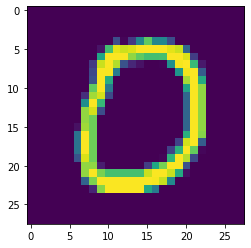

In [116]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(Mnist_Test_X[index].reshape((28, 28)))
if d["Y_prediction_test"][0][index] == 1:
    filler = 'it is 0'
else:
    filler = 'it is not 0'

#print ("y = " + str(Mnist_Test_y[0,index]) + ", you predicted that it is a " + int(d["Y_prediction_test"][0,index]).decode("utf-8")+ ' picture')
print ("y = " + str(Mnist_Test_y[index]) + " you predicted that " + filler)